In [2]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import functions notebook and load data set here
from function_notebook_1 import *

In [4]:
#training data 2012 - 2018
df1 = pd.read_csv('data/postseason08.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df2 = pd.read_csv('data/postseason09.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df3 = pd.read_csv('data/postseason10.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df4 = pd.read_csv('data/postseason11.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df5 = pd.read_csv('data/postseason12.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
 
df7 = pd.read_csv('data/postseason14.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df8 = pd.read_csv('data/postseason15.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df9 = pd.read_csv('data/postseason16.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df10 = pd.read_csv('data/postseason17.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
df11 = pd.read_csv('data/postseason18.csv').drop(['Unnamed: 0','w_loc'], axis = 1)

df = pd.concat([df1, df2, df3, df4, df5, df7, df8, df9, df10, df11])
df['w_loc_H'] = 0
df['w_loc_N'] = 1

#testing data 2019
dftest = pd.read_csv('data/postseason13.csv').drop(['Unnamed: 0','w_loc'], axis = 1)
dftest['w_loc_H'] = 0
dftest['w_loc_N'] = 1

In [5]:
#train_test_split
X_train=df.drop('fav_win',axis=1)
X_test=dftest.drop('fav_win',axis=1)
y_train=df['fav_win']
y_test = dftest['fav_win']

X_train.shape, X_test.shape

((661, 108), (67, 108))

In [6]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [8]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.8169172932330827
Train Mean Accuracy: 0.8577912254160364
Test Mean Accuracy: 0.8507462686567164
Recall Score: 0.8260869565217391
Precision Score: 0.95
F1 Score: 0.8837209302325583


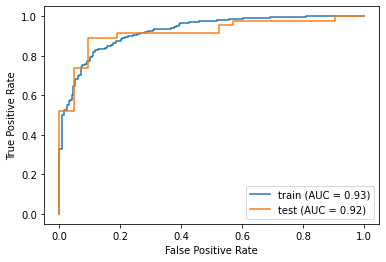

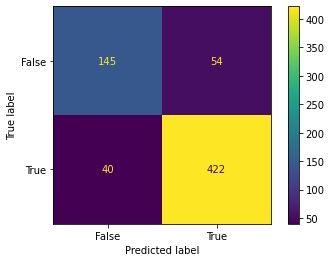

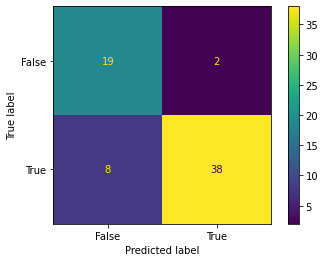

In [9]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

In [10]:
#knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [11]:
#dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [12]:
#X_train_best_dtree=X_train[dtree_feats]
#X_test_best_dtree=X_test[dtree_feats]

In [13]:
#dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [14]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

Number of Trees: 500
Criterion: entropy
Mean Cross-Val Score: 0.7761221234905445
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.7910447761194029
Recall Score: 0.9130434782608695
Precision Score: 0.8076923076923077
F1 score: 0.8571428571428572


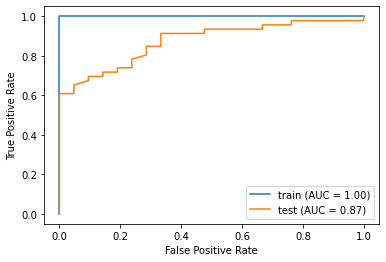

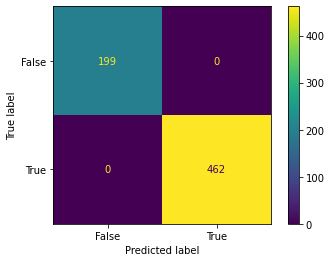

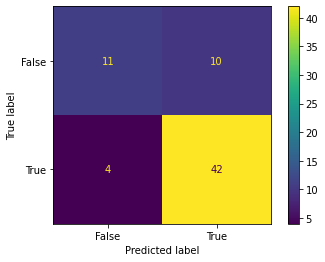

In [15]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

In [16]:
#bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 4
XGBoost Min Child Weight: 3
XGBoost Subsample: 1
XGBoost Estimators: 500
Mean Cross-Val Score: 0.7897015265436317
Train Mean Accuracy Score: 1.0
Test Mean Accuracy Score: 0.7761194029850746
Recall Score: 0.8260869565217391
Precision Score: 0.8444444444444444
F1 score: 0.8351648351648352


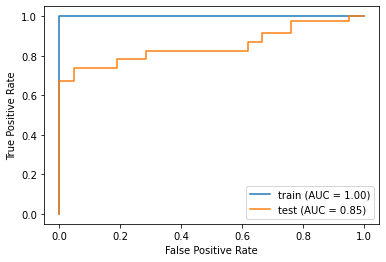

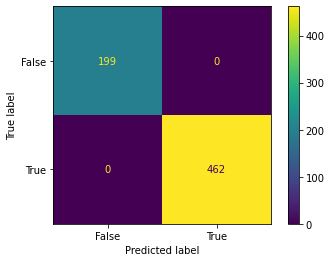

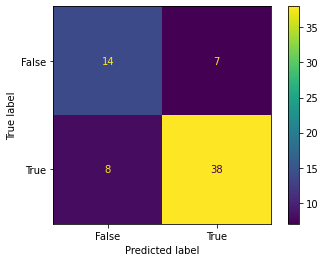

In [17]:
xgboost(X_train, X_test, y_train, y_test, cv=5)